In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

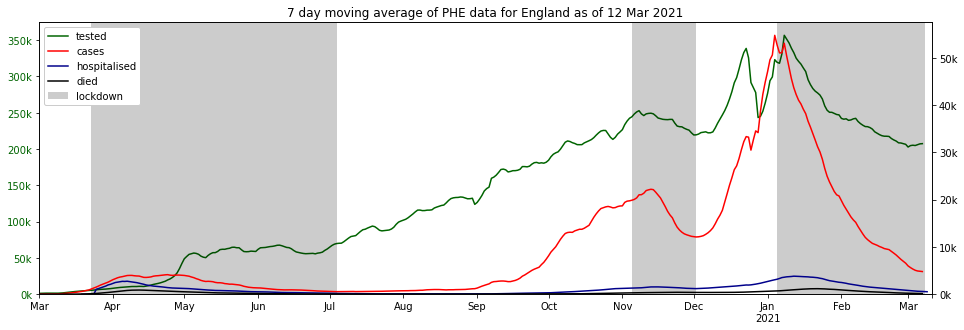

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

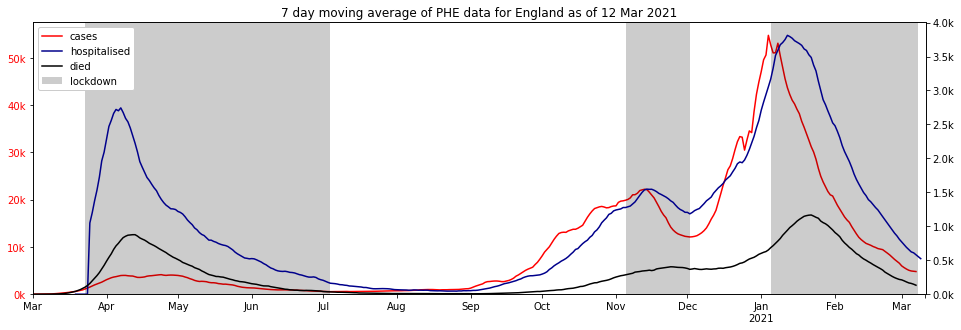

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1008912.0,19798473.0,18789561.0,56286961,1.792444,33.381729,64.825827
1,Northern Ireland,N92000002,49400.0,614629.0,565229.0,1893667,2.608695,29.848384,67.542921
2,Scotland,S92000003,149409.0,1844636.0,1695227.0,5463300,2.734776,31.029360,66.235865
3,Wales,W92000004,237357.0,1056787.0,819430.0,3152879,7.528262,25.989897,66.481841


'partial: 23,314,525 (34.9%), full: 1,445,078'

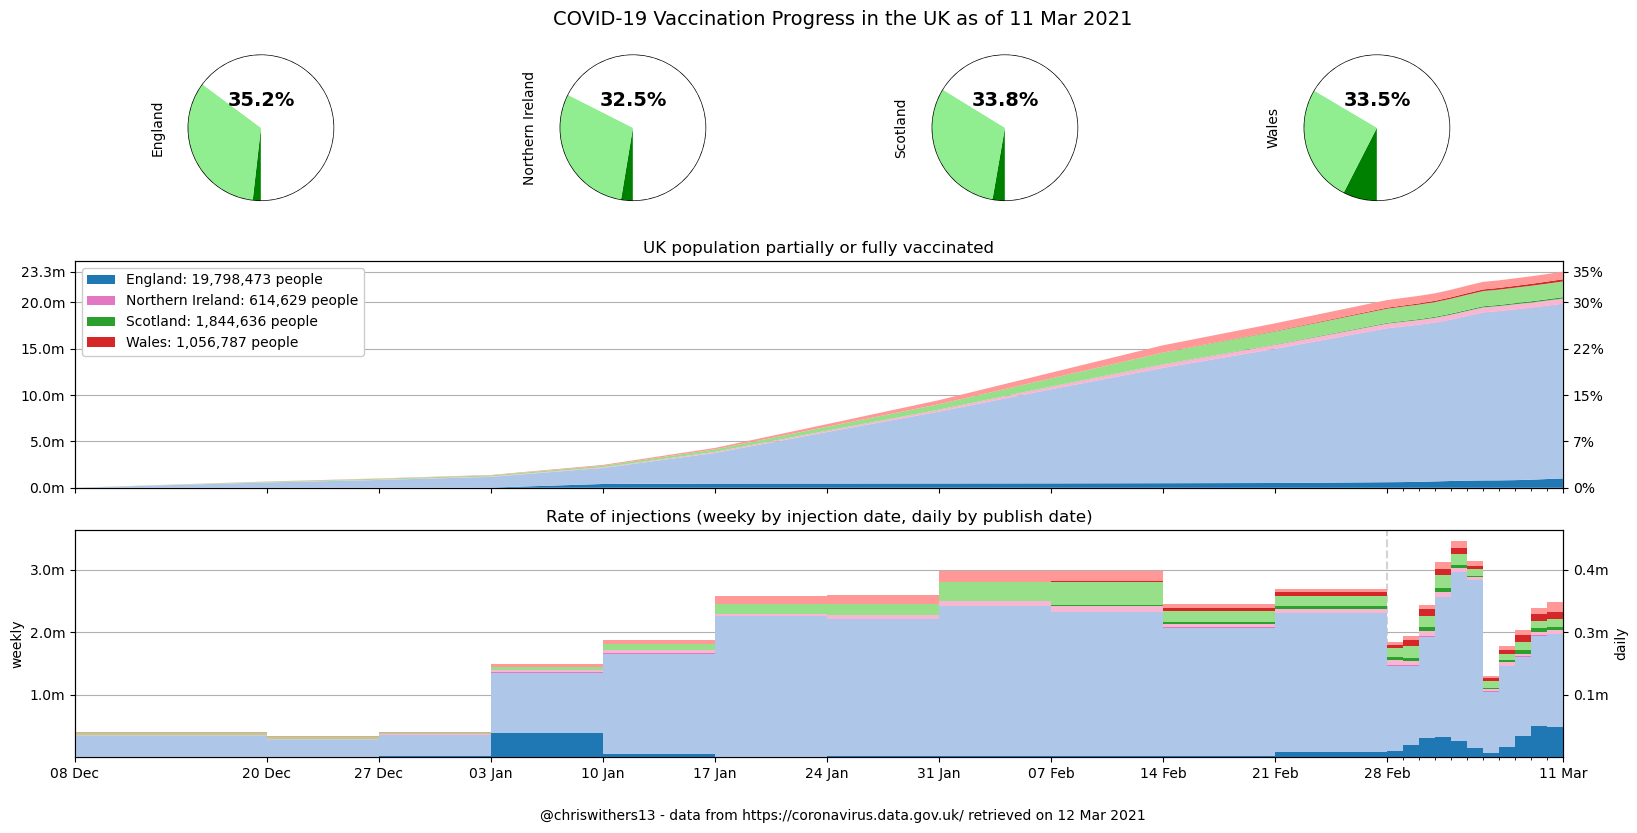

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,11 Mar 21,"+211,393","+69,680","+69,680","+19,798,473","+1,008,912","+1,008,912"
Northern Ireland,11 Mar 21,"+7,934",+452,+452,"+614,629","+49,400","+49,400"
Scotland,11 Mar 21,"+18,836","+7,976","+7,976","+1,844,636","+149,409","+149,409"
Wales,11 Mar 21,"+22,646","+15,455","+15,455","+1,056,787","+237,357","+237,357"


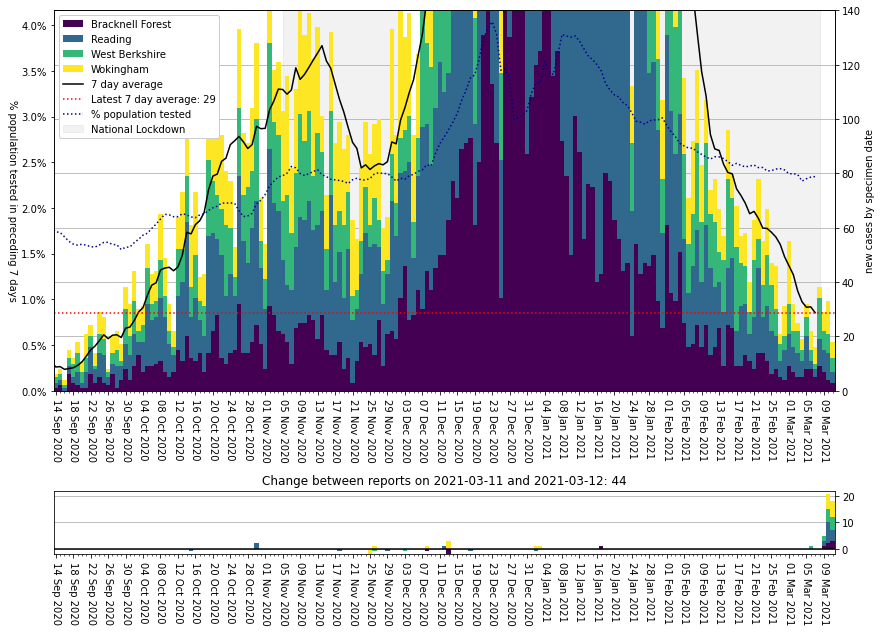

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

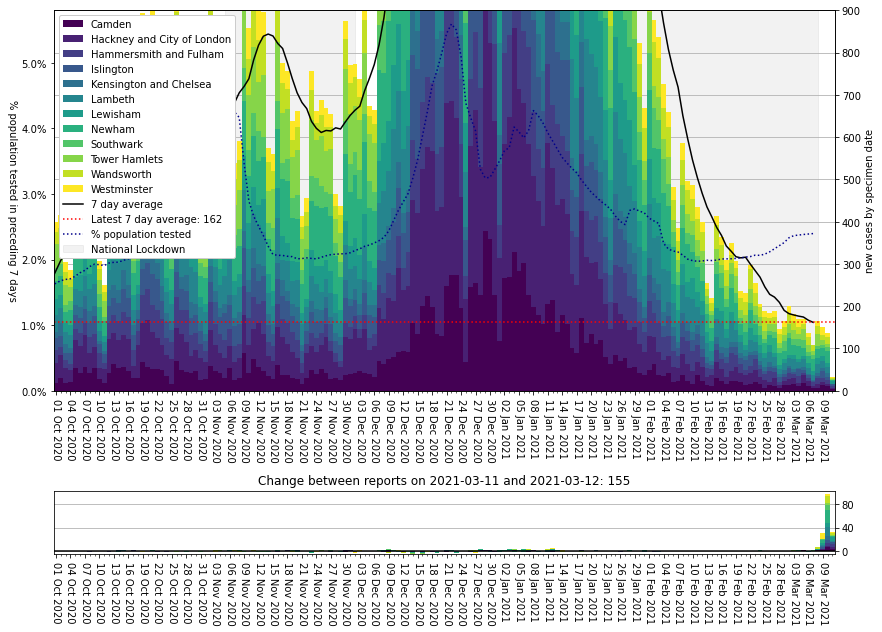

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000035,Derbyshire Dales,149.325959,108.0,2021-03-11
E07000150,Corby,148.162508,107.0,2021-03-11
E07000236,Redditch,143.090041,122.0,2021-03-11
E06000010,"Kingston upon Hull, City of",134.730424,350.0,2021-03-11
S12000030,Stirling,131.620847,124.0,2021-03-11
E08000032,Bradford,127.830804,690.0,2021-03-11
E07000123,Preston,127.152688,182.0,2021-03-11
E08000016,Barnsley,125.574198,310.0,2021-03-11
E06000012,North East Lincolnshire,120.955359,193.0,2021-03-11


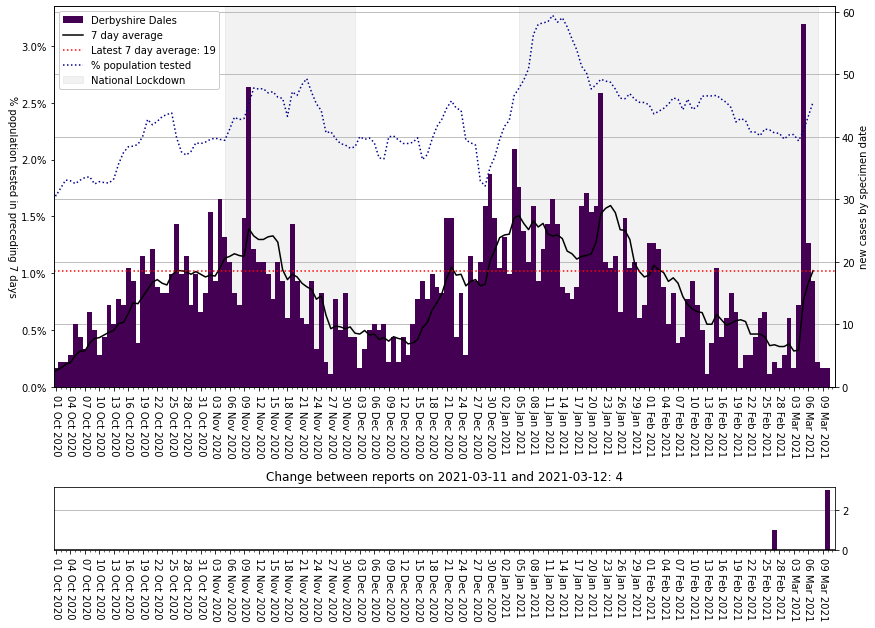

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,69.625929,795.0,2021-03-11
E08000035,Leeds,93.300166,740.0,2021-03-11
S12000049,Glasgow City,114.512257,725.0,2021-03-11
E08000032,Bradford,127.830804,690.0,2021-03-11
E08000003,Manchester,79.586440,440.0,2021-03-11
E08000019,Sheffield,73.693732,431.0,2021-03-11
E08000036,Wakefield,117.136361,408.0,2021-03-11
E08000034,Kirklees,90.270972,397.0,2021-03-11
E06000016,Leicester,106.712137,378.0,2021-03-11


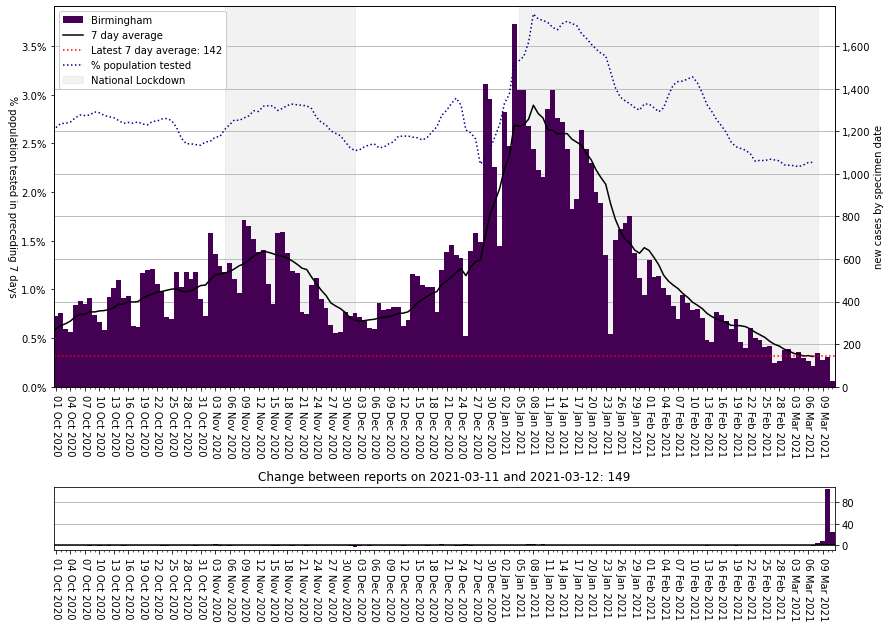

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

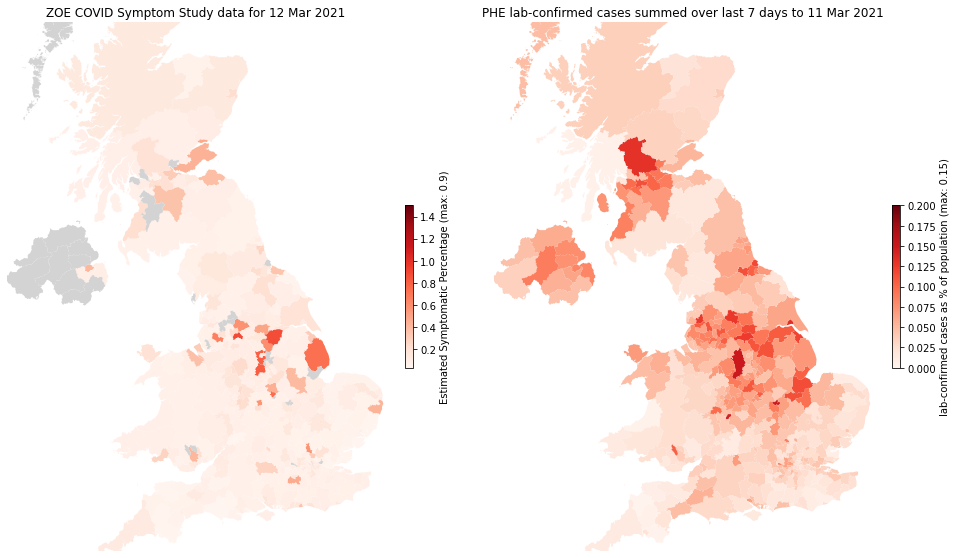

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

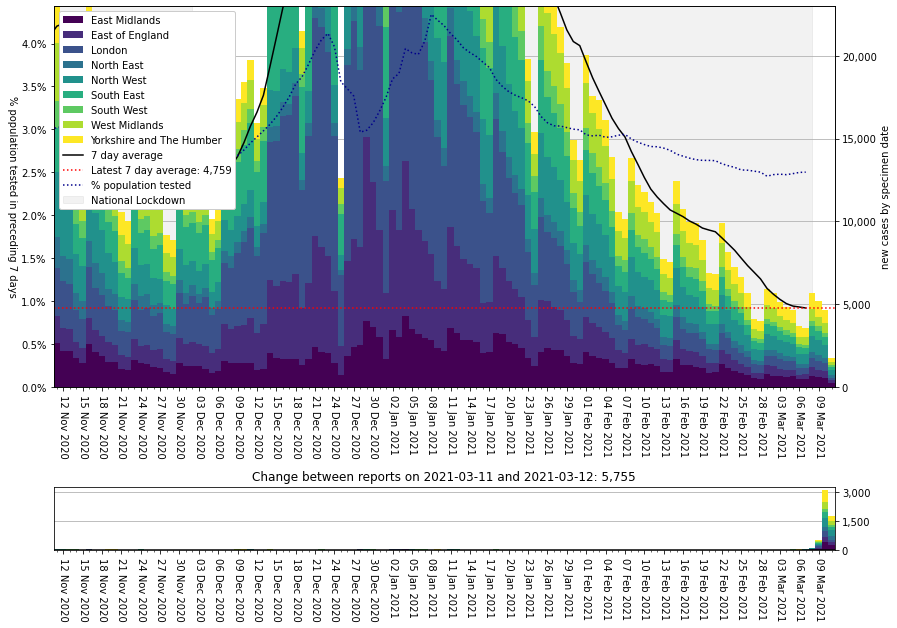

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

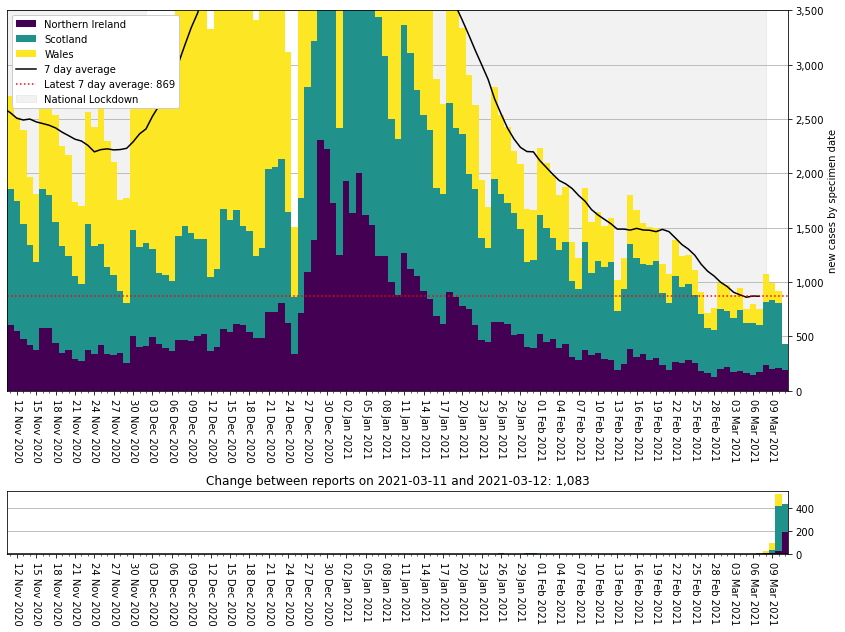

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')